### Car Price Regression Project:
This project aims at preprocessing, cleaning, and applying feature engineering on a car price dataset and developing best machine learning model to predict the price of the care given the features.

1) Importing Necessary Libraries
2) Exploratory Data Analysis & Preprocessing
3) Feature Engineering (Dealing with outliers and scaling data)
4) Splitting Dataset
5) Developing The Model
<hr>

### *Libraries*

In [1]:
import pandas as pd #Pandas: Data manipulation library, used for working with dataframes
import numpy as np #Numpy: Numerical computing library, used for working with arrays
import matplotlib.pyplot as plt #Matplotlib: Visualization library, used for creating plots and charts
import seaborn as sns #Seaborn: Visualization library, used for creating plots and charts
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler #Scalers and encoders: Data preprocessing tools
from sklearn.model_selection import train_test_split #Train test split: Data splitting tool

# ********** Models **********
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# ********** Models **********

from sklearn.metrics import mean_squared_error, r2_score #Metrics: Model evaluation tools
import mlflow #MLflow: Experiment tracking tool

In [2]:
# Set the style of the plots
plt.style.use('seaborn-v0_8')
sns.set_palette("icefire")

<hr>

### *EDA & Data Preprocessing*
Exploring and viewing the dataset in order to get insights about cleaning and processing

In [3]:
df = pd.read_csv('car.csv') #Read the data from the CSV file

In [4]:
df.head() #Display the first few rows of the dataframe

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


##### Insights Noticed: 
1) We only need the brand name (first word) from the 'Name' column
2) In 'Mileage', 'Engine', and 'Power' the values are stored with their units meaning they're strings, but we need to clean it and get only the numerical value of the features
3) All Categorical data should be encoding according to their type (Nominal or Ordinal)

let's explore the data further..

In [5]:
df.isnull().sum() #Check for missing values in the dataframe

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

New_Price has many missing values, it can't be beneficial for the problem at hand, would be wise to drop it

In [6]:
df.info() #Get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


#### Dropping duplicates, and 'New_Price' column filled with null values

In [7]:
df = df.drop_duplicates() #Drop duplicate rows from the dataframe

In [8]:
df.drop(['New_Price'], axis=1, inplace=True) #Drop the 'New_Price' column from the dataframe

#### Mileage

In [9]:
def clean_mileage(x): #Function to clean the 'Mileage' column
    try: 
        return float(x.split(' ')[0]) #Split the string and return the first part as a float
    except:
        return np.nan #Return NaN if an error occurs

In [10]:
df['Mileage'] = df['Mileage'].apply(clean_mileage) #Apply the function to the 'Mileage' column

In [11]:
df['Mileage'].isnull().sum() #Check for missing values in the 'Mileage' column

2

#### Engine

Same goes for Engine

In [12]:
df['Engine'].unique() #Get the unique values in the 'Engine' column

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [13]:
def clean_engine(x): #Function to clean the 'Engine' column
    try:
        return int(x.split(' ')[0]) #Split the string and return the first part as an integer
    except:
        return np.nan #Return NaN if an error occurs

In [14]:
df['Engine'] = df['Engine'].apply(clean_engine) #Apply the function to the 'Engine' column

In [15]:
df['Engine'].isnull().sum() #Check for missing values in the 'Engine' column

36

#### Power

In [16]:
df['Power'].unique() #Get the unique values in the 'Power' column

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [17]:
def clean_power(x): #Function to clean the 'Power' column by removing 'bhp' and converting to float
    try:
        return float(x.split(' ')[0]) #Split the string and return the first part as a float
    except:
        return np.nan

In [18]:
df['Power'] = df['Power'].apply(clean_power) #Apply the function to the 'Power' column

In [19]:
df['Power'].isnull().sum() #Check for missing values in the 'Power' column

143

#### Names

In [20]:
df['Name'].unique() #Get the unique values in the 'Name' column

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [21]:
def get_brand(x): #Function to extract the brand name from the 'Name' column
    return x.split(' ')[0] #Split the string and return the first part

In [22]:
df['Brand'] = df['Name'].apply(get_brand) #Apply the function to the 'Name' column

### Data Transformation

In [23]:
df.info() #Get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


#### Encoding Data

In [24]:
Nominal_list = ['Name', 'Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'] #List of nominal columns
Ordinal_list = ['Owner_Type']    #List of ordinal columns

In [25]:
for column in Nominal_list: #Loop through the nominal columns
    le = LabelEncoder() #Create a label encoder
    df[column] = le.fit_transform(df[column]) #Fit and transform the column

In [26]:
for column in Ordinal_list: #Loop through the ordinal columns
    oe = OrdinalEncoder() #Create an ordinal encoder
    df[column] = oe.fit_transform(df[column].values.reshape(-1, 1)) #Fit and transform the column

In [27]:
df.info() #Get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   int32  
 1   Location           6019 non-null   int32  
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int32  
 5   Transmission       6019 non-null   int32  
 6   Owner_Type         6019 non-null   float64
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   int32  
dtypes: float64(6), int32(5), int64(2)
memory usage: 493.9 KB


In [28]:
df.isnull().sum() #Check for missing values in the dataframe

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
dtype: int64

In [29]:
df['Seats'].unique() #Get the unique values in the 'Seats' column

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [30]:
df.head() #Display the first few rows of the dataframe

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,1200,9,2010,72000,0,1,0.0,26.60,998.0,58.16,5.0,1.75,18
1,512,10,2015,41000,1,1,0.0,19.67,1582.0,126.20,5.0,12.50,10
2,486,2,2011,46000,4,1,0.0,18.20,1199.0,88.70,5.0,4.50,9
3,1059,2,2012,87000,1,1,0.0,20.77,1248.0,88.76,7.0,6.00,18
4,23,3,2013,40670,1,0,2.0,15.20,1968.0,140.80,5.0,17.74,1


#### Dropping Null Values

In [31]:
df.isnull().sum() #Check for missing values in the dataframe

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
dtype: int64

In [32]:
df.dropna(inplace=True) #Drop rows with missing values from the dataframe

In [33]:
df['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 5872, dtype: float64

In [34]:
# count values in the 'Seats' column
df['Seats'].value_counts()

Seats
5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: count, dtype: int64

<hr>

### *Feature Engineering*

In [35]:
Numerical_list = ['Mileage', 'Engine', 'Power', 'Seats'] #List of numerical columns

##### The data is now cleaned, time for visualization and plotting to give insights about need Feature Engineering techniques

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


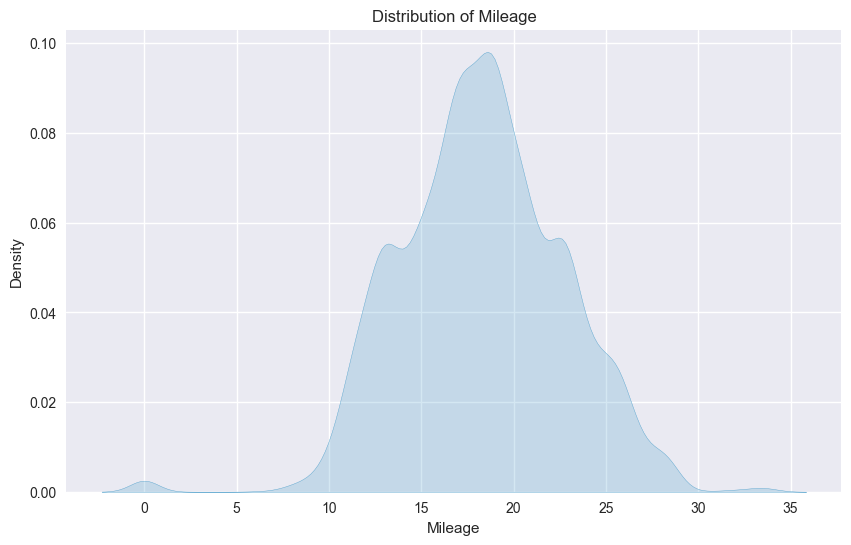

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


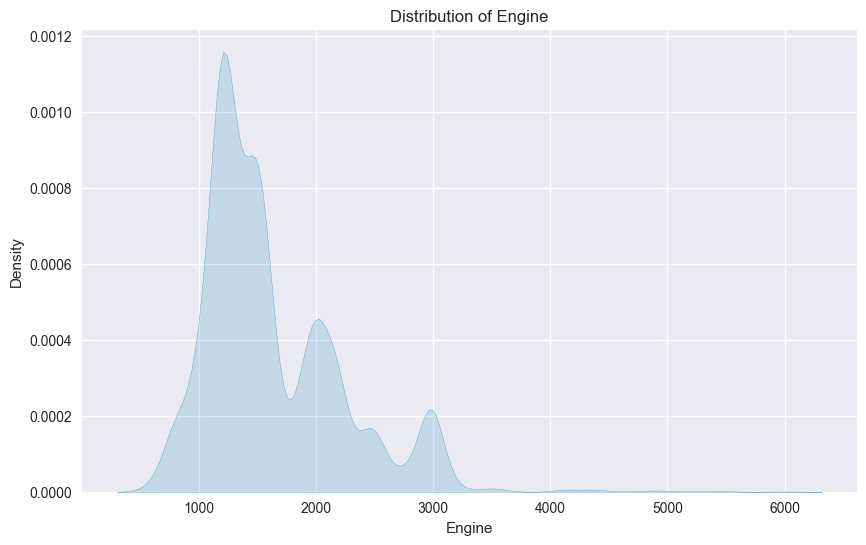

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


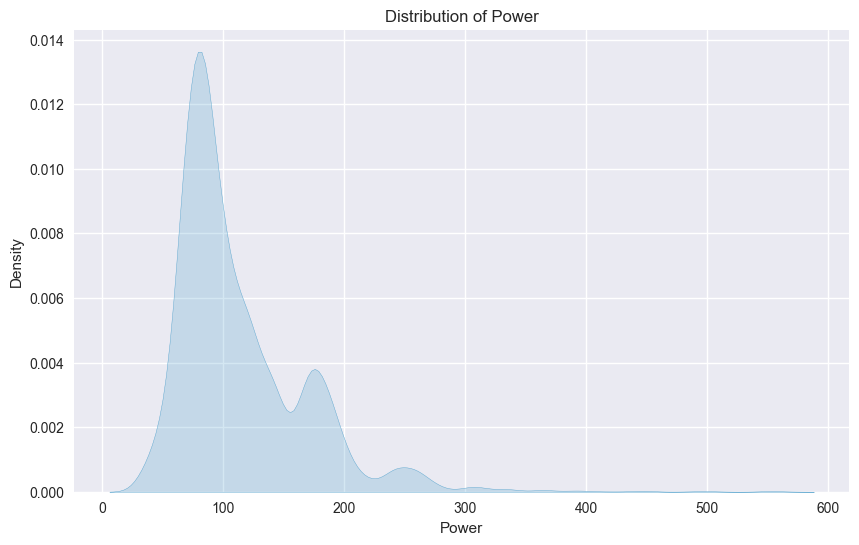

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


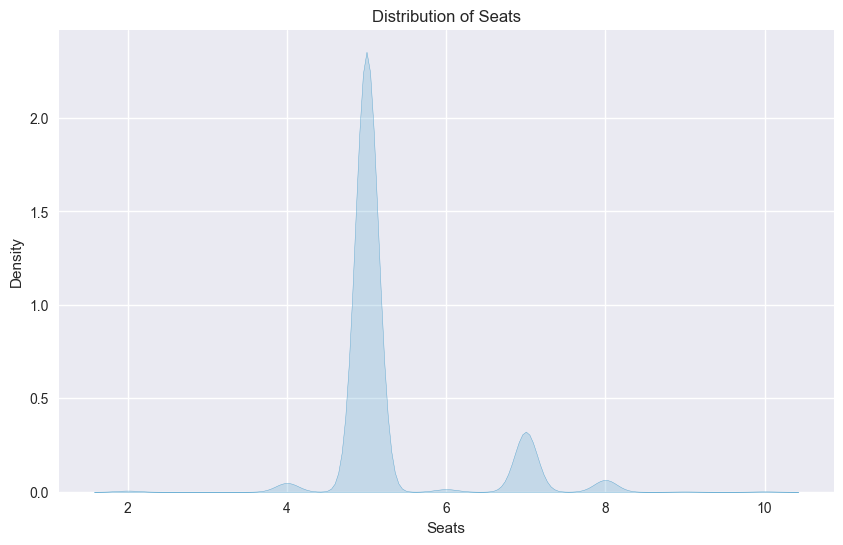

In [36]:
# Distribution of each numerical column after scaling
for column in Numerical_list:
    plt.figure(figsize=(10, 6)) # Set the figure size
    sns.kdeplot(data=df[column], fill=True) # Create a kernel density plot for each column
    plt.title(f'Distribution of {column}') # Set the title of the plot
    plt.show() # Display the plot

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


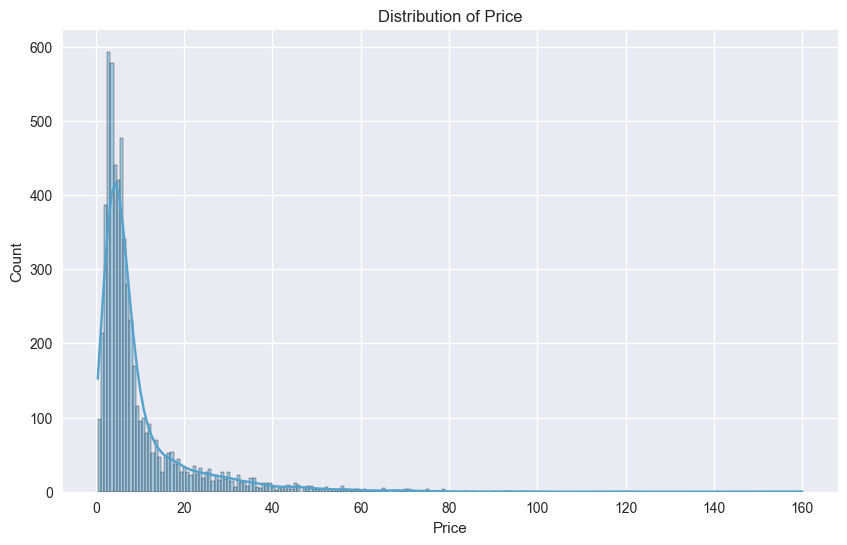

In [37]:
# plot the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6)) #Set the figure size
sns.histplot(df['Price'], kde=True) #Create a histogram of the 'Price' column
plt.title('Distribution of Price') #Set the title of the plot
plt.show() #Display the plot

##### We should make box plot for the numerical values to check for outliers

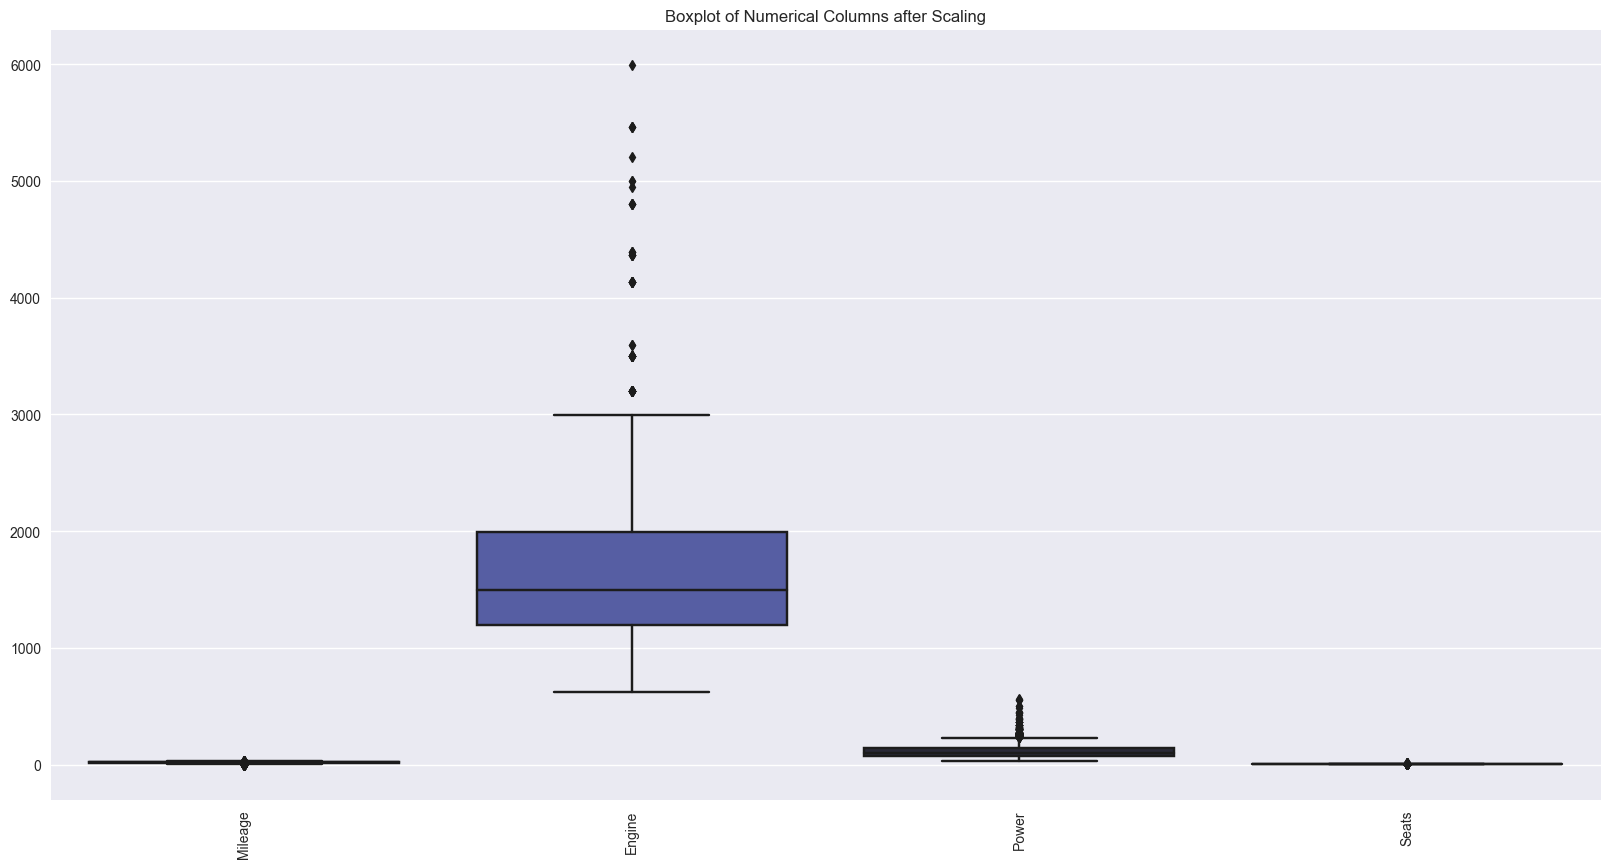

In [38]:
# boxplot for numerical columns after scaling
plt.figure(figsize=(20, 10)) #Set the figure size
sns.boxplot(data=df[Numerical_list]) #Create a boxplot of the numerical columns
plt.xticks(rotation=90) #Rotate the x-axis labels
plt.title('Boxplot of Numerical Columns after Scaling') #Set the title of the plot
plt.show() #Display the plot

In [39]:
# Determine the outliers in the numerical columns and remove them
Q1 = df[Numerical_list].quantile(0.25) #Calculate the first quartile
Q3 = df[Numerical_list].quantile(0.75) #Calculate the third quartile
IQR = Q3 - Q1 #Calculate the interquartile range
outliers = df[~((df[Numerical_list] < (Q1 - 1.5 * IQR)) | (df[Numerical_list] > (Q3 + 1.5 * IQR))).any(axis=1)] #Detect outliers
df = outliers #Update the dataframe with the rows that are not outliers


c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


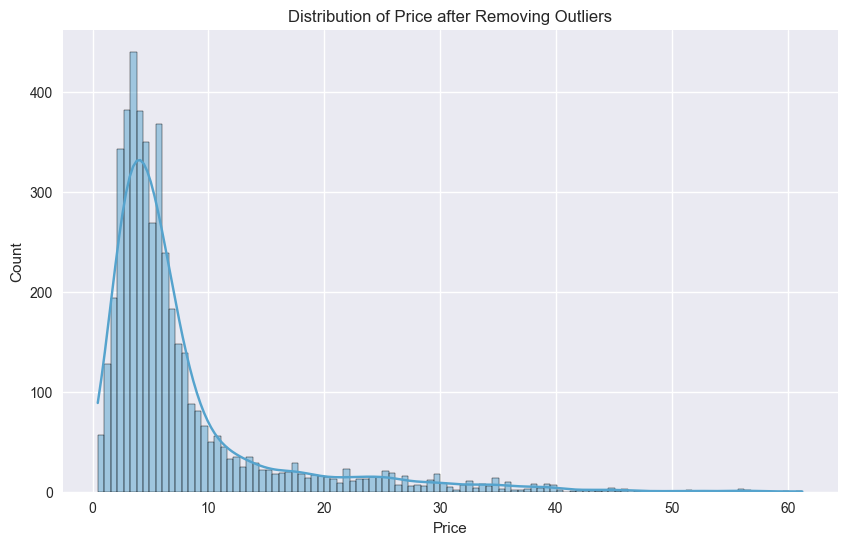

In [40]:
# plot the distribution of the target variable 'Price' after removing outliers
plt.figure(figsize=(10, 6)) #Set the figure size
sns.histplot(df['Price'], kde=True) #Create a histogram of the 'Price' column
plt.title('Distribution of Price after Removing Outliers') #Set the title of the plot
plt.show() #Display the plot

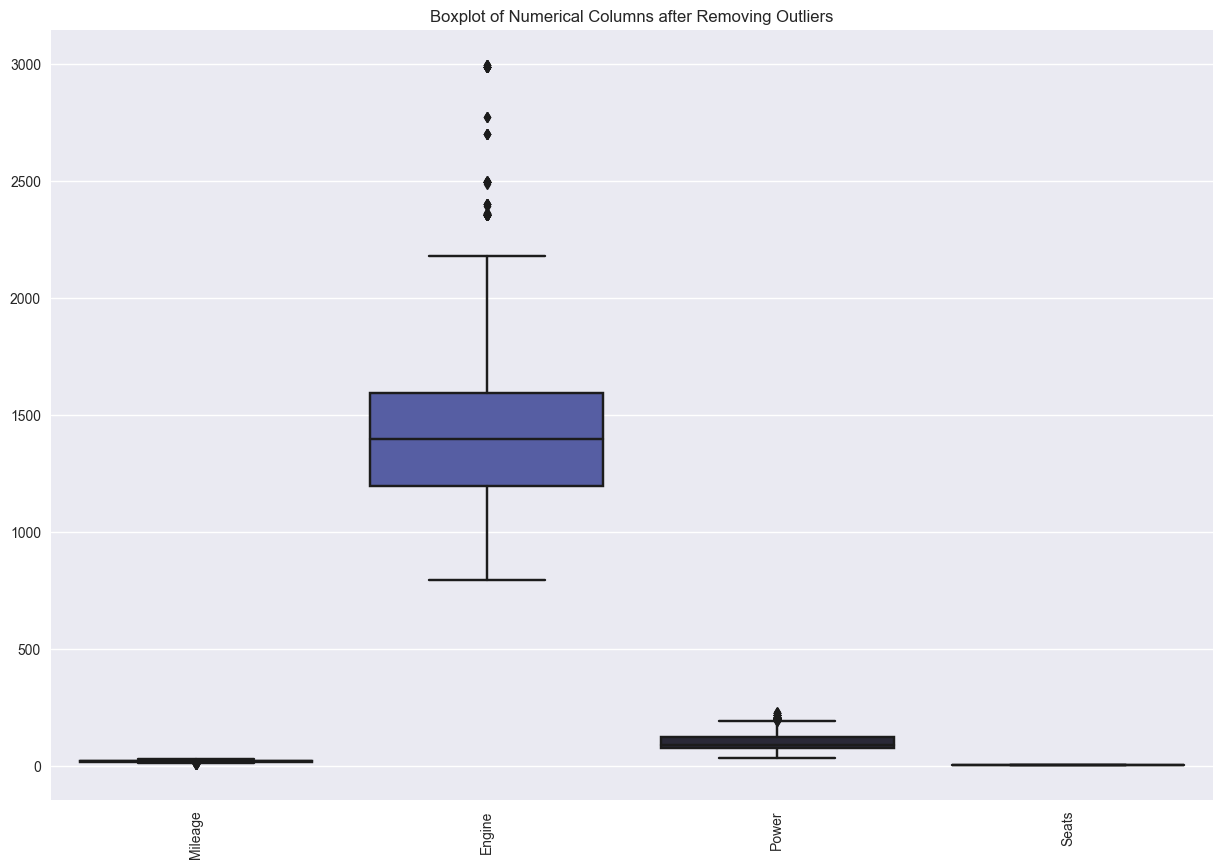

In [41]:
# plot boxplot for numerical columns after removing outliers
plt.figure(figsize=(15, 10)) #Set the figure size
sns.boxplot(data=df[Numerical_list]) #Create a boxplot of the numerical columns
plt.xticks(rotation=90) #Rotate the x-axis labels
plt.title('Boxplot of Numerical Columns after Removing Outliers') #Set the title of the plot
plt.show() #Display the plot

#### The features look noticeably better, some outliers still exist yet they may be valid points due to the inherent skewness in features and they're real values, time to scale the numerical features.

<hr>

#### Violin Plots are a good way to understand the distribution and density of the features related to the price

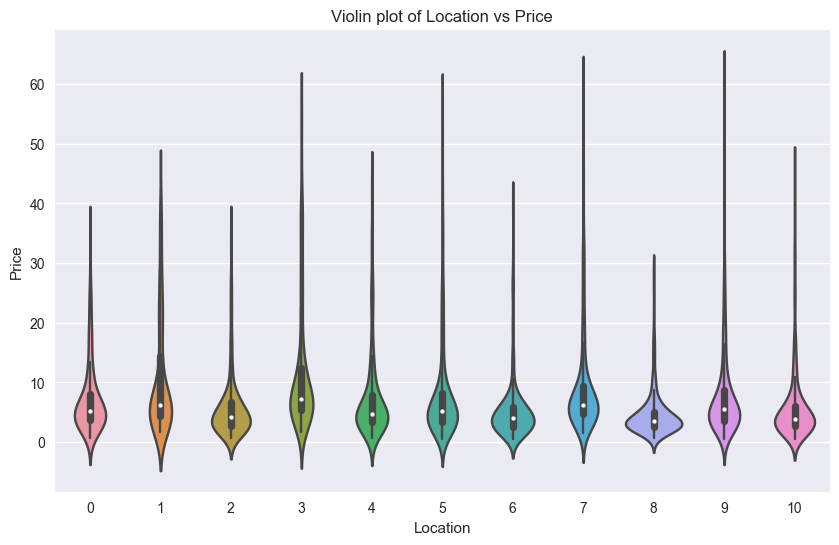

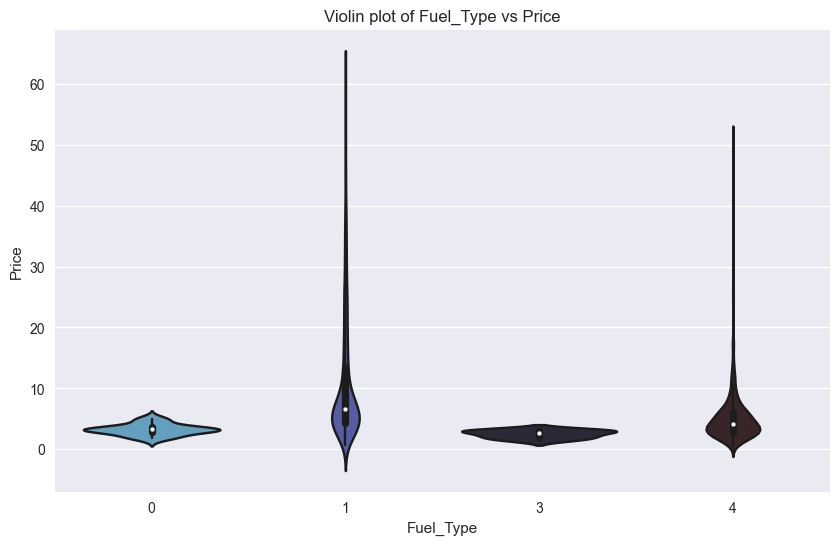

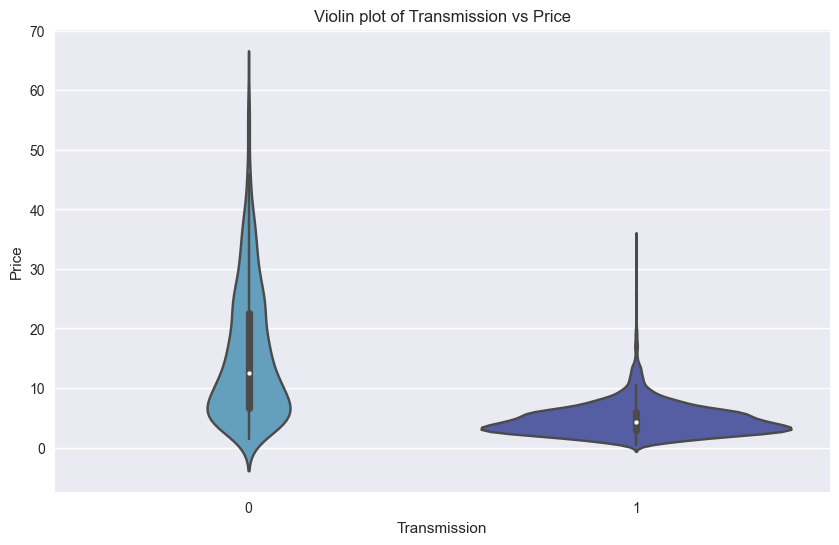

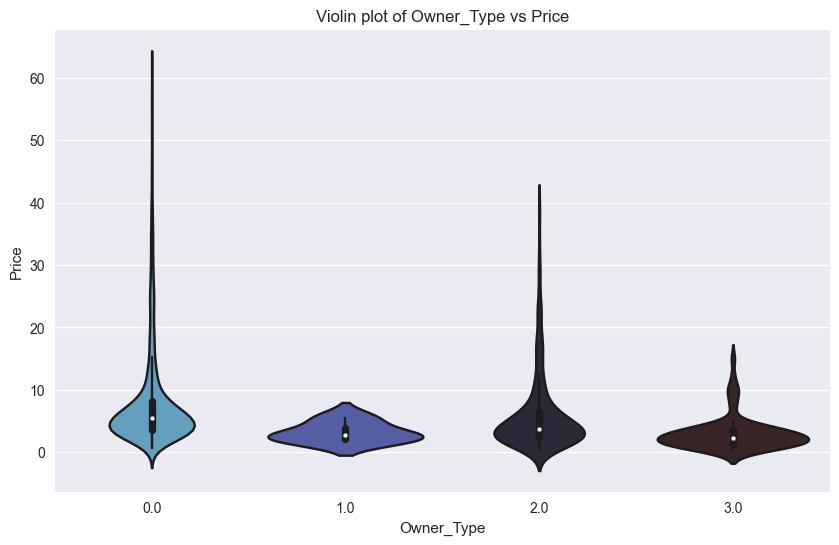

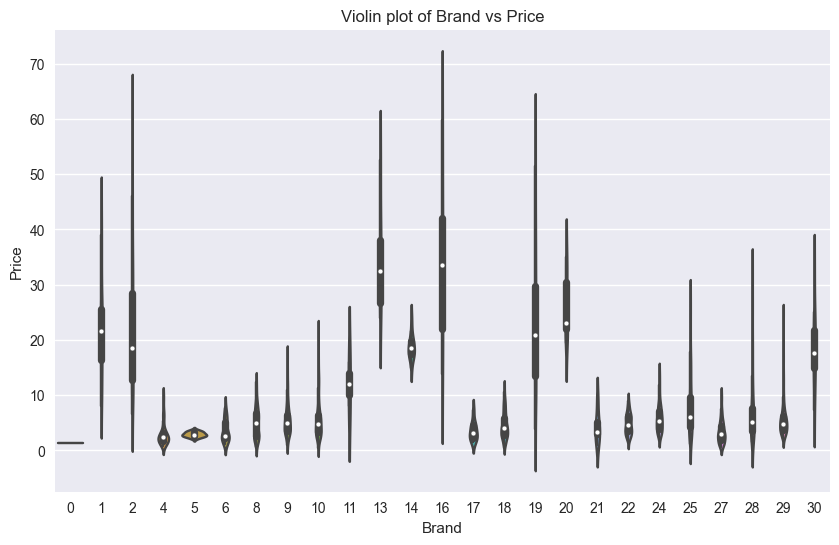

In [42]:
# violin plot for categorical columns
categorical_list = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'] #List of categorical columns
for column in categorical_list: #Loop through the categorical columns
    plt.figure(figsize=(10, 6)) #Set the figure size
    sns.violinplot(x=column, y='Price', data=df) #Create a violin plot
    plt.title(f'Violin plot of {column} vs Price') #Set the title of the plot
    plt.show() #Display the plot


In [43]:
scaler = RobustScaler() #Create a robust scaler
for column in Numerical_list: #Loop through the numerical columns
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1)) #Fit and transform the column

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayman\AppData\Local\Temp\ipykernel_21764\3502631429.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[Numerical_list]) #Create a kernel density plot


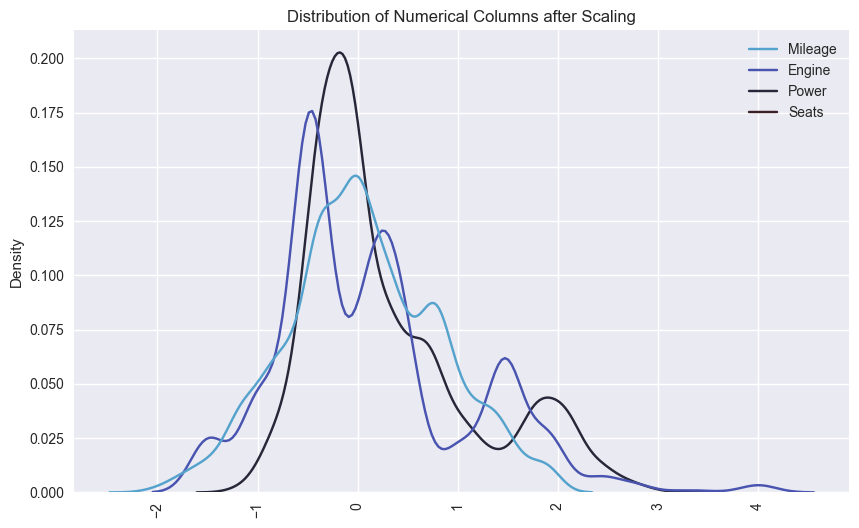

In [44]:
# Distribution of the numerical columns after scaling
plt.figure(figsize=(10, 6)) #Set the figure size
sns.kdeplot(data=df[Numerical_list]) #Create a kernel density plot
plt.xticks(rotation=90) #Rotate the x-axis labels
plt.title('Distribution of Numerical Columns after Scaling') #Set the title of the plot
plt.show() #Display the plot

<hr>

#### Correlation Matrix: extracting the relations between the variable (including features and target) to know how strong they relate to each other linearly, a good way to apply feature selection with the important features only, and check for redundancy in features

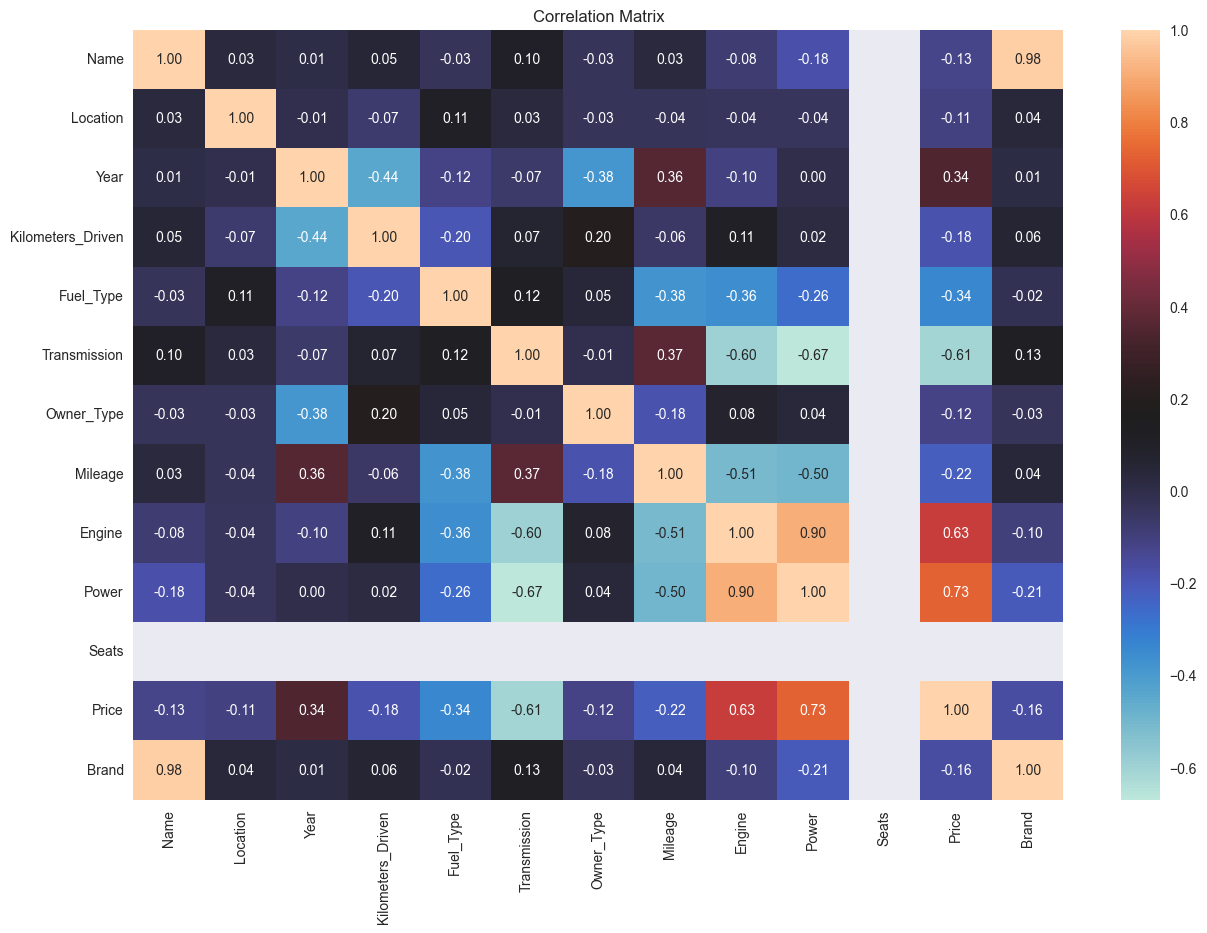

In [45]:
# Correlation matrix
plt.figure(figsize=(15, 10)) #Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='icefire', fmt='.2f') #Create a heatmap of the correlation matrix
plt.title('Correlation Matrix') #Set the title of the plot
plt.show() #Display the plot

#### Here we can see the correlation between our target "Price" and the features, we can also see the redundancy between 'Name' & 'Brand', we should get rid of one.

In [46]:
df.drop(['Name'], axis=1, inplace=True) #Drop the 'Name' column from the dataframe

#### *Data Splitting*

In [47]:
X = df.drop(['Price'], axis=1) #Get the features
y = df['Price'] #Get the target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split the data into training and testing sets

## *Modelling*

**1) Linear Regression**

In [49]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

mlflow.set_experiment("linear_regression") #Set the experiment name
with mlflow.start_run():
    # Initialize and train the model
    lr = LinearRegression(n_jobs=-1)
    lr.fit(X_train, y_train)

    # Make predictions
    y_pred = lr.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log parameters, metrics, and model
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(lr, "model")

    # Print metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')

2024/09/23 03:02:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/23 03:02:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run bittersweet-calf-339 at: http://127.0.0.1:5000/#/experiments/631313091726538405/runs/ee4dc8baa88341f2a8dc2ad42b2c5489.
2024/09/23 03:02:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/631313091726538405.


Mean Squared Error: 19.34692264168782
R2 Score: 0.6989613769161241


**2) Decision Tree Regressor**

In [51]:
# Define hyperparameters
dt_params = {
    'max_depth': 7,
    'random_state': 42,
    'criterion': 'squared_error',
    'splitter': 'best',
    'min_samples_split': 4,
    'min_samples_leaf': 3
}

mlflow.set_experiment("decision_tree") # Set the experiment name
with mlflow.start_run():
    # Initialize and train the model
    dt = DecisionTreeRegressor(**dt_params)
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred = dt.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log parameters, metrics, and model
    mlflow.log_param("model_type", "DecisionTree")
    mlflow.log_params(dt_params)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(dt, "model")

    # Print metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')

2024/09/23 03:03:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/23 03:03:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run lyrical-bass-493 at: http://127.0.0.1:5000/#/experiments/446152044442393530/runs/80a01b8e75af46f49daf5f6687875df5.
2024/09/23 03:03:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/446152044442393530.


Mean Squared Error: 9.159022562798256
R2 Score: 0.8574853690086187


**3) Random Forest Regressor**

In [53]:
# Define hyperparameters
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': 42,
    'criterion': 'poisson',
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

mlflow.set_experiment("random_forest") #Set the experiment name
with mlflow.start_run():
    # Initialize and train the model
    rf = RandomForestRegressor(**rf_params)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log parameters, metrics, and model
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_params(rf_params)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(rf, "model")

    # Print metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')

2024/09/23 03:03:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/23 03:03:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-fawn-805 at: http://127.0.0.1:5000/#/experiments/667882316063888926/runs/78aebf225d7241218d11d727a0257f81.
2024/09/23 03:03:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/667882316063888926.


Mean Squared Error: 6.127488634716787
R2 Score: 0.904656116338494


**4) XGBoost Regressor**

In [57]:
xgb_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.1,
    'random_state': 42,
    'objective': 'reg:squarederror',
    'booster': 'gbtree'
}

mlflow.set_experiment("xgboost") #Set the experiment name
with mlflow.start_run():
    # Initialize and train the model
    xgb = XGBRegressor(**xgb_params)
    xgb.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log parameters, metrics, and model
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_params(xgb_params)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(xgb, "model")

    # Print metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')

2024/09/23 03:04:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/23 03:04:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run gentle-fowl-492 at: http://127.0.0.1:5000/#/experiments/569611578839078095/runs/b271f70f7439423b8a5daecc3d8c2792.
2024/09/23 03:04:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/569611578839078095.


Mean Squared Error: 5.991319322403873
R2 Score: 0.9067749144049435


**5) LightGBM Regressor**

In [64]:
# Define hyperparameters
lgbm_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'learning_rate': 0.1,
    'random_state': 42,
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'num_leaves': 19
}

mlflow.set_experiment("lightgbm") #Set the experiment name
with mlflow.start_run():
    # Initialize and train the model
    lgbm = LGBMRegressor(**lgbm_params)
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_pred = lgbm.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Log parameters, metrics, and model
    mlflow.log_params(lgbm_params)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(lgbm, "model")

    # Print metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 3798, number of used features: 10
[LightGBM] [Info] Start training from score 7.679516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


2024/09/23 03:07:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/23 03:07:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run puzzled-ram-135 at: http://127.0.0.1:5000/#/experiments/897004280252505666/runs/e88d236fda954be79c6b0710fdf03995.
2024/09/23 03:07:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/897004280252505666.


Mean Squared Error: 3.8554939310597427
R2 Score: 0.9400084134407223


<hr>

#### ***Conclusion***: after cleaning, processing, and applying feature engineering on our dataset, we were able to develop several models for car price prediction:
``1. Linear Regression (Mean Squared Error: 19.34692264168782, R2 Score: 0.6989613769161241)``

``2. Decision Tree (Mean Squared Error: 9.159022562798256, R2 Score: 0.8574853690086187)``

``3. Random Forest (Mean Squared Error: 6.127488634716787, R2 Score: 0.904656116338494)``

``4. XGBoost (Mean Squared Error: 5.991319322403873, R2 Score: 0.9067749144049435)``

**``5. LightGBM (Mean Squared Error: 3.8554939310597427, R2 Score: 0.9400084134407223)``**


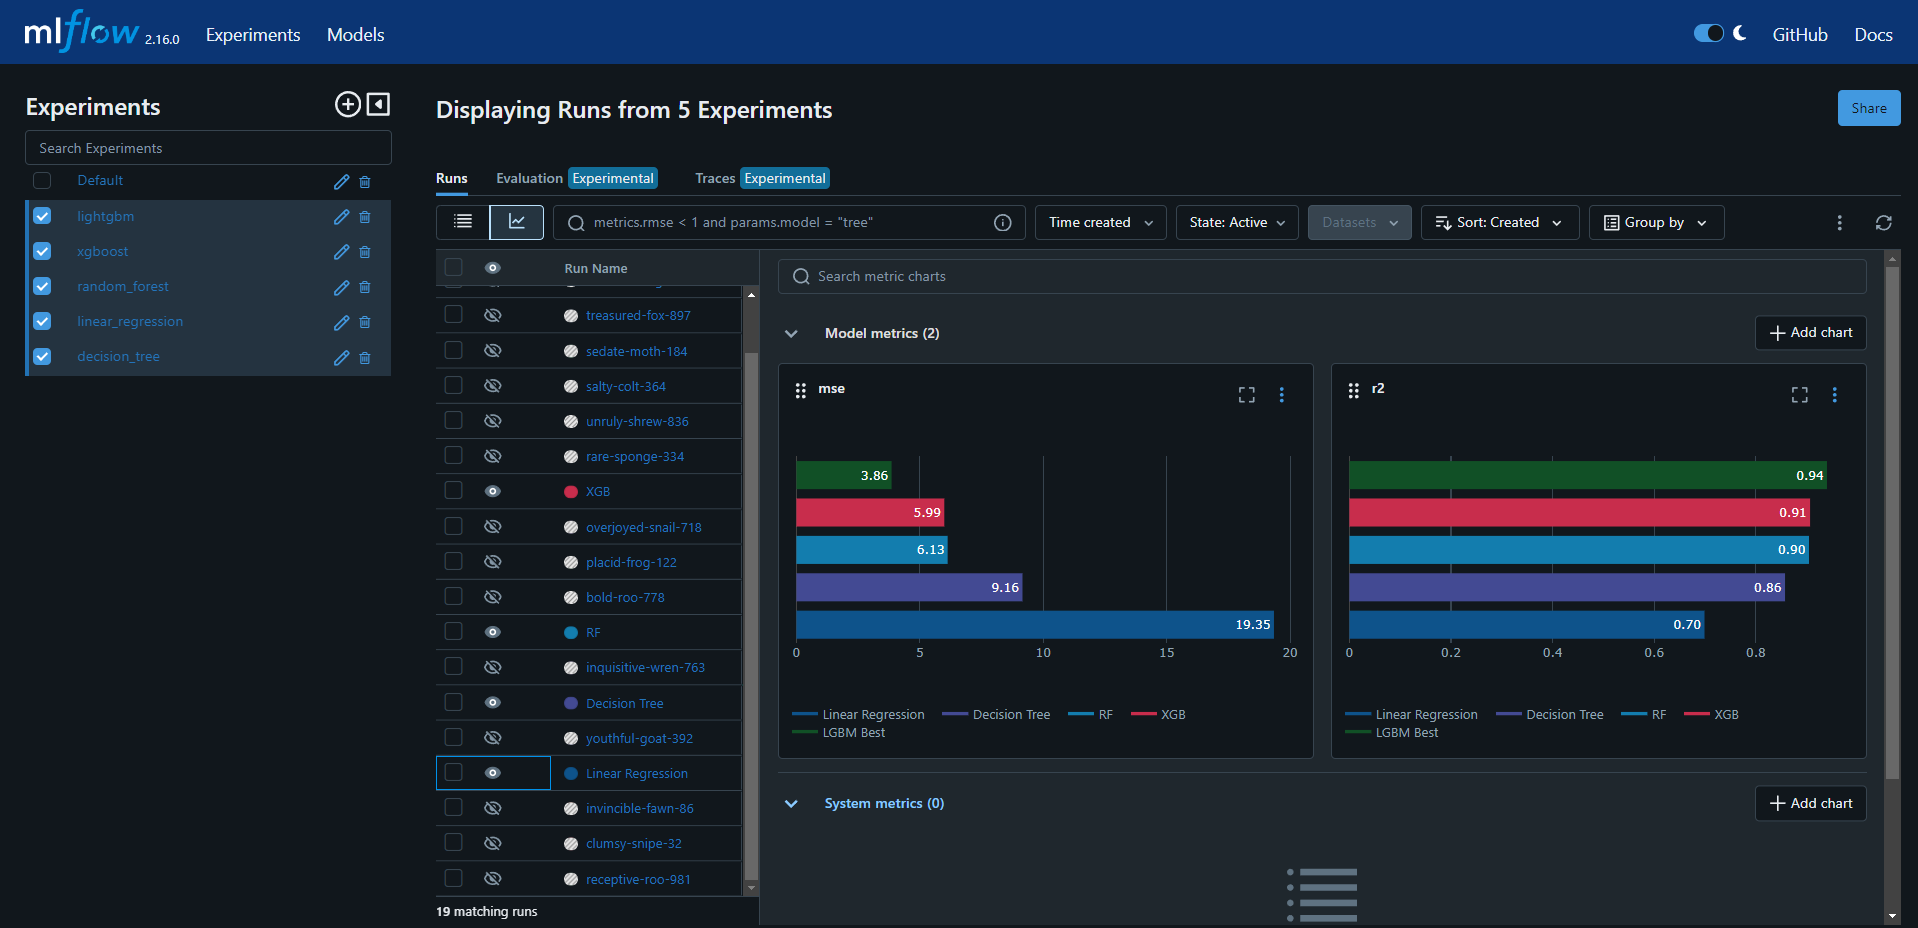